In [1]:
%load_ext autoreload
%autoreload 2

import ergast_loader
import plot

Driver colors and linestyle is only configured for 2020 so far.

In [2]:
# import refresh_ergast
# refresh_ergast.refresh()
ergast = ergast_loader.ErgastLoader('data//ergast_data')

## delta from target driver

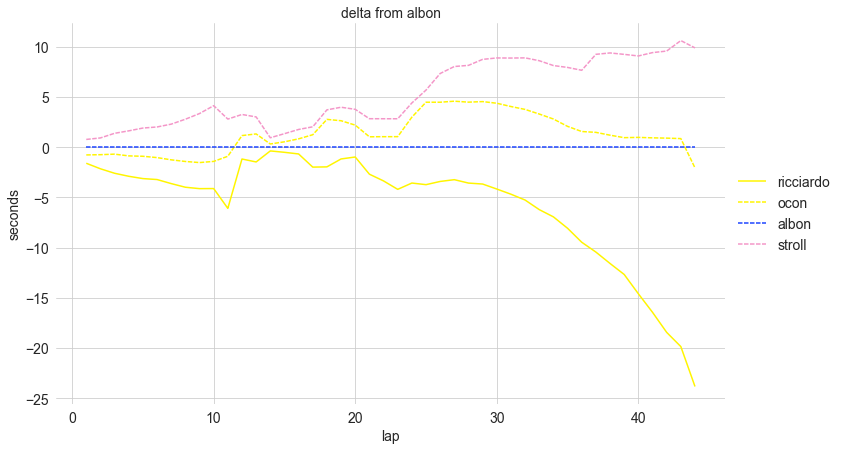

In [3]:
fig, ax = plot.delta_chart(
    ergast, 
    race=(2020, 7), 
    tgt_driver='albon',
    driver_refs=['albon', 'ocon', 'stroll', 'ricciardo']
)

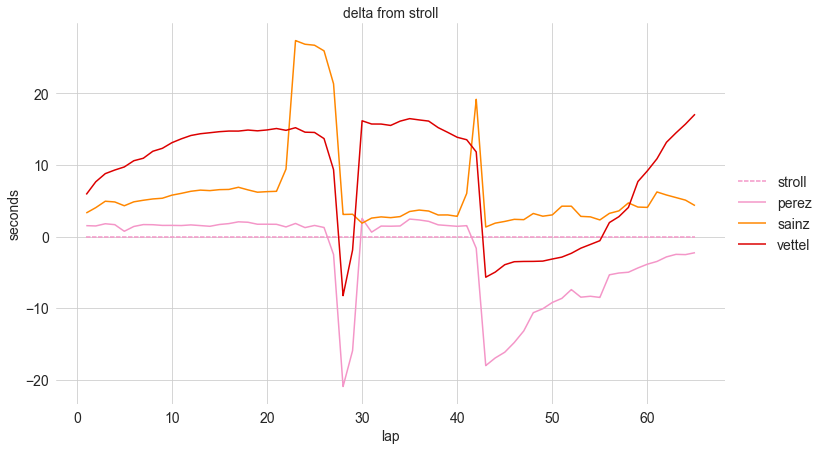

In [4]:
fig, ax = plot.delta_chart(
    ergast, 
    race='2020_spanish_grand_prix', 
    tgt_driver='stroll',
    driver_refs=['stroll', 'perez', 'sainz', 'vettel']
)

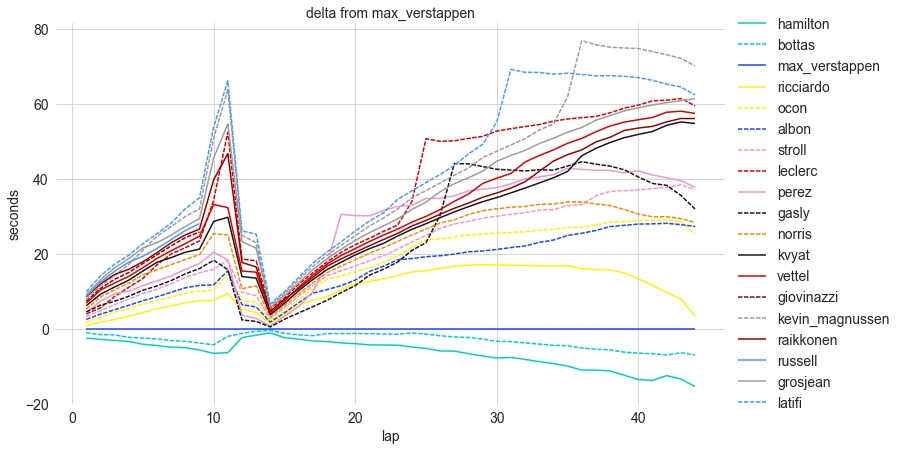

In [7]:
fig, ax = plot.delta_chart(
    ergast, 
    race=(2020, 7), 
    tgt_driver='max_verstappen',
)
fig.savefig('deleteme.png', dpi=300, bbox_inches='tight')